Age: how long ago did the galaxy form its first stars?
 
Tau: (a bit difficult to explain, so let's use this simple version) A parameter, also expressed in the units of time, which describes how fast/slow the process of star formation proceeds.
 
Stellar Mass: the total amount of mass in stars (because we know there is also gas and dark matter, right)? Usually expressed in units of the mass of the Sun so we don't have to deal with very large numbers.
 
Dust (A_v): Amount of cosmic dust in a galaxy, measured as the diminishing of optical light (since dust absorbs optical waves). 

## Importing Python Libraries

In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np 

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Create DataFrames
galaxyProperties = pd.read_csv("GalaxyProperties.csv")
spectra = pd.read_csv("spectra.csv")
wavelengths = pd.read_csv("wavelengths.csv")

## Visualizing Spectra

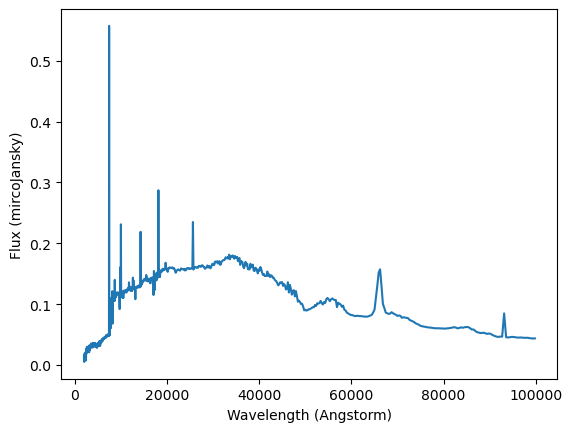

In [3]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[0].values[0].split(" ")])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

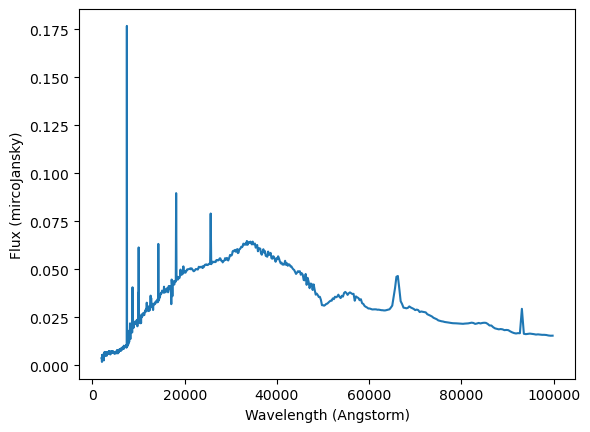

In [4]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[1].values[0].split(" ")])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

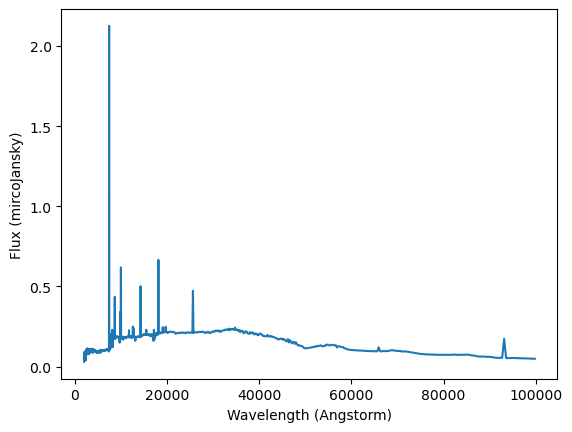

In [5]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[2].values[0].split(" ")])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

## Data Preprocessing

In [6]:
#Selecting Target 1: Age (Gyr)
age = galaxyProperties['Age (Gyr)']

age_values = age.values

In [7]:
#Selecting Target 2: Tau (Gyr)
tau = galaxyProperties['Tau (Gyr)']

tau_values = tau.values

In [8]:
#Selecting Target 3: Stellar Mass (Log10 Mass_Sun)
stellarMass = galaxyProperties['Log10(Mass/Mass_Sun)']

stellarMass_values = stellarMass.values

In [9]:
#Selecting Target 4: Dust
dust = galaxyProperties['Dust attenuation value']

dust_values = dust.values

In [10]:
#Converting Spectra Data Into 850 Features
m = []
c = []

m.append(spectra.columns.values[0].split(" "))
for i in range(len(spectra)):
    m.append(spectra.loc[i][0].split(" "))
for i in range(850):
    c.append(f"feature_{1+i}")
 
spectra =  pd.DataFrame(m, columns=c)
X = spectra.values
spectra.shape

(1000, 850)

## Creating Models

### Linear Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.9999999999986109 

Test Score:  -17468074.752325654 

r2 mean cross validate score: -4601983.772985758 

neg_mean_squared_error mean cross validate score: -2869893.954004752 

neg_root_mean_squared_error mean cross validate score: -1231.7559667736114 

neg_mean_absolute_error mean cross validate score: -155.07149955136697 



### KNN Regressor

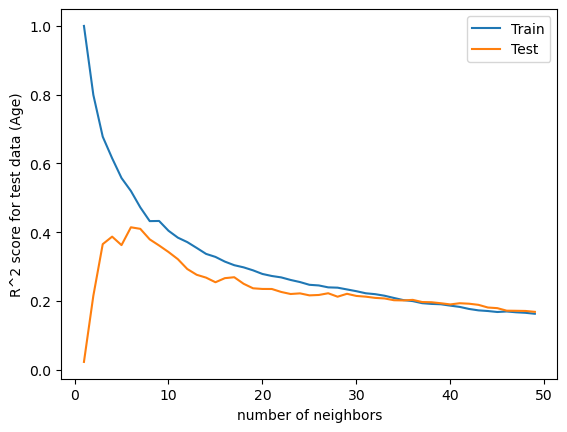

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=8)
cv_scores = cross_validate(knn, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.43215117898950595 

Test Score:  0.37904963818847337 

r2 mean cross validate score: 0.29424761317220016 

neg_mean_squared_error mean cross validate score: -0.47468203751791743 

neg_root_mean_squared_error mean cross validate score: -0.6878196976850122 

neg_mean_absolute_error mean cross validate score: -0.4602400699289054 



### Decision Tree Regression

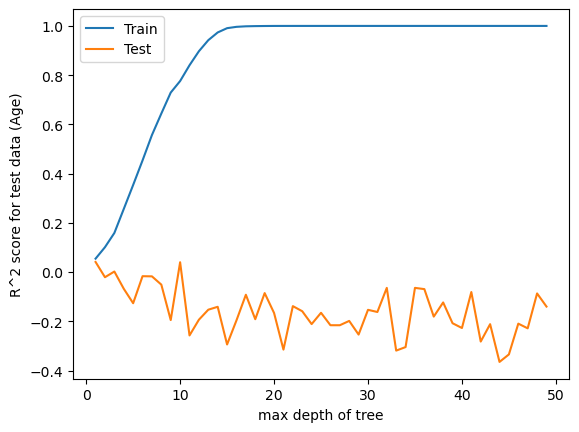

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max depth of tree")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
print("Train Score: ",dt.score(X_train, y_train),"\n")
print("Test Score: ",dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=3)
cv_scores = cross_validate(dt, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.15878608471714994 

Test Score:  0.03747537432892167 

r2 mean cross validate score: 0.024829440380336586 

neg_mean_squared_error mean cross validate score: -0.6547032790608274 

neg_root_mean_squared_error mean cross validate score: -0.8080175619350409 

neg_mean_absolute_error mean cross validate score: -0.5489483889132817 



### Reducing Features

In [16]:
# Finding important features
features = spectra.columns
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X,age_values)

lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

#top 10 most import features
lasso_coef_df[lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10)

/Users/janet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.960e+02, tolerance: 6.717e-02
  model = cd_fast.enet_coordinate_descent(


,feature,coef
0,feature_311,0.222102
1,feature_320,0.167061
2,feature_328,0.144440
3,feature_693,0.105291
4,feature_481,0.089547
5,feature_728,0.076257
6,feature_835,0.075220
7,feature_435,0.073977
8,feature_333,0.063096
9,feature_324,0.059766


In [17]:
# Selecting important features
threshold = 0.1
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
print(f"{len(spectra.columns) - len(list(not_important_features))} features remain")

10 features remain


In [18]:
#Creating a new df to reference the reduced features
new_spectra = spectra.drop(not_important_features, axis=1)

new_spectra.shape

(1000, 10)

In [19]:
#Recapture features
X2 = new_spectra.values

### Linear Regression with Reduced Features

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X2, age_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X2, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.09644210316886914 

Test Score:  -0.0653131270559899 

r2 mean cross validate score: 0.026642220348609524 

neg_mean_squared_error mean cross validate score: -0.653270044028952 

neg_root_mean_squared_error mean cross validate score: -0.8074987260334447 

neg_mean_absolute_error mean cross validate score: -0.5490541940836826 



### KNN Regression with Reduced Features


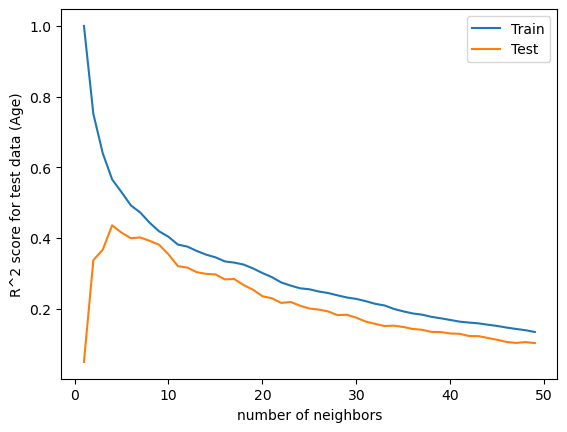

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X2, age_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X2, age_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
cv_scores = cross_validate(knn, X2, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.5295567939242545 

Test Score:  0.41495598768934283 

r2 mean cross validate score: 0.2944879577144244 

neg_mean_squared_error mean cross validate score: -0.47426699711590325 

neg_root_mean_squared_error mean cross validate score: -0.6871628182975972 

neg_mean_absolute_error mean cross validate score: -0.44689461261771807 



### Decision Tree Regression with Reduced Features

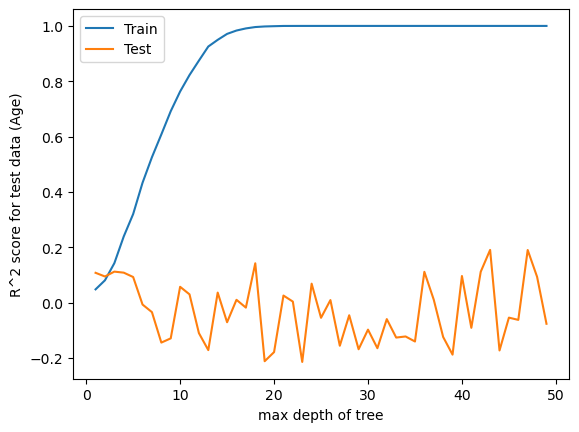

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X2, age_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max depth of tree")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X2, age_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
print("Train Score: ",dt.score(X_train, y_train),"\n")
print("Test Score: ",dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=3)
cv_scores = cross_validate(dt, X2, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.1426059347148667 

Test Score:  0.11204046896770903 

r2 mean cross validate score: 0.05455756227585644 

neg_mean_squared_error mean cross validate score: -0.6346223488980209 

neg_root_mean_squared_error mean cross validate score: -0.7956069311067846 

neg_mean_absolute_error mean cross validate score: -0.5491578114929888 



# Tests

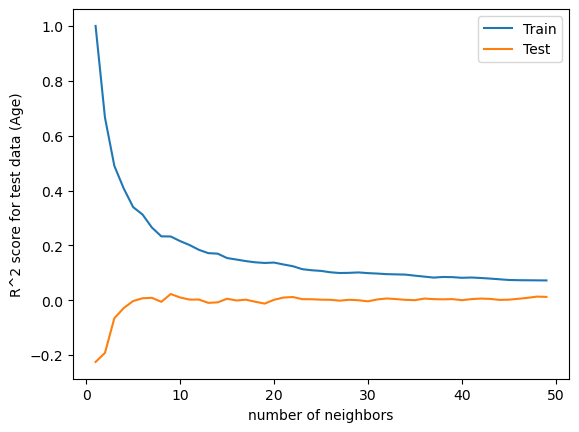

Train Score:  0.1373410179801976 

Test Score:  0.0017796489895204326 

r2 mean cross validate score: 0.020753987004695752 

neg_mean_squared_error mean cross validate score: -1.9874096559568177 

neg_root_mean_squared_error mean cross validate score: -1.4015682520221646 

neg_mean_absolute_error mean cross validate score: -0.7064460560214042 



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=20)
cv_scores = cross_validate(knn, X, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [26]:
# Finding important features
features = spectra.columns
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X,tau_values)
lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

# Selecting important features
threshold = 0.1
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

display(lasso_coef_df[lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10))

#number of important features based on threshold var
print(f"{len(spectra.columns) - len(list(not_important_features))} features remain")

new_spectra = spectra.drop(not_important_features, axis=1)
X2 = new_spectra

/Users/janet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.482e+02, tolerance: 2.042e-01
  model = cd_fast.enet_coordinate_descent(


,feature,coef
0,feature_6,1.155917
1,feature_287,0.117967
2,feature_328,0.089597
3,feature_481,0.076752
4,feature_429,0.075548
5,feature_431,0.061143
6,feature_333,0.055362
7,feature_357,0.052817
8,feature_758,0.052045
9,feature_352,0.048382


9 features remain


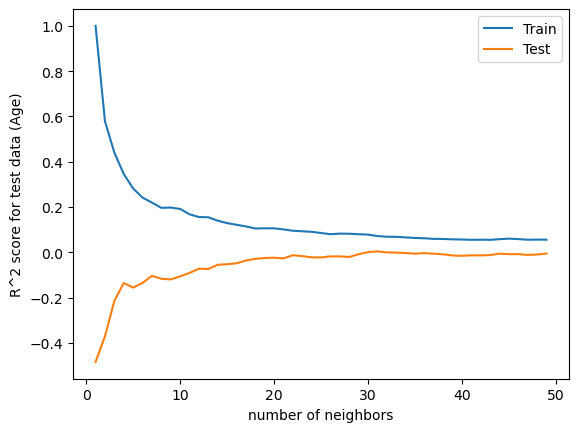

Train Score:  0.1057842601048905 

Test Score:  -0.02414547563716396 

r2 mean cross validate score: -0.018085076405635992 

neg_mean_squared_error mean cross validate score: -2.064153879449118 

neg_root_mean_squared_error mean cross validate score: -1.4286754577018113 

neg_mean_absolute_error mean cross validate score: -0.717891269903606 



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X2, tau_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=20)
cv_scores = cross_validate(knn, X2, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

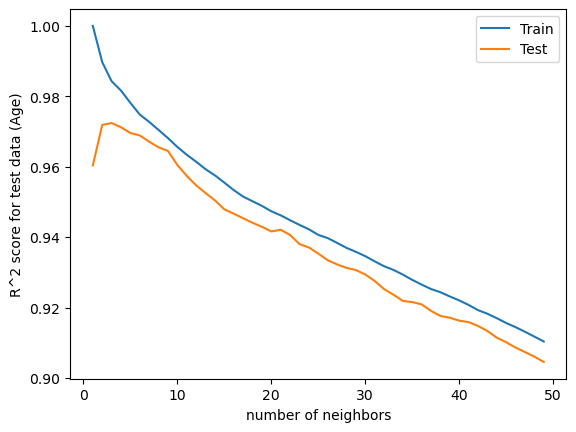

Train Score:  0.9842882044740907 

Test Score:  0.9724207903540447 

r2 mean cross validate score: 0.968390769603652 

neg_mean_squared_error mean cross validate score: -0.016447259353576864 

neg_root_mean_squared_error mean cross validate score: -0.1279022989682964 

neg_mean_absolute_error mean cross validate score: -0.09211693453101126 



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [29]:
# Finding important features
features = spectra.columns
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X,stellarMass)
lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

# Selecting important features
threshold = 0.1
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

display(lasso_coef_df[lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10))

#number of important features based on threshold var
print(f"{len(spectra.columns) - len(list(not_important_features))} features remain")

new_spectra = spectra.drop(not_important_features, axis=1)
X2 = new_spectra

/Users/janet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+02, tolerance: 5.223e-02
  model = cd_fast.enet_coordinate_descent(


,feature,coef
0,feature_298,1.401877
1,feature_9,0.372747
2,feature_6,0.354376
3,feature_295,0.224319
4,feature_303,0.221437
5,feature_360,0.166392
6,feature_323,0.131526
7,feature_330,0.111265
8,feature_693,0.079927
9,feature_835,0.079152


17 features remain


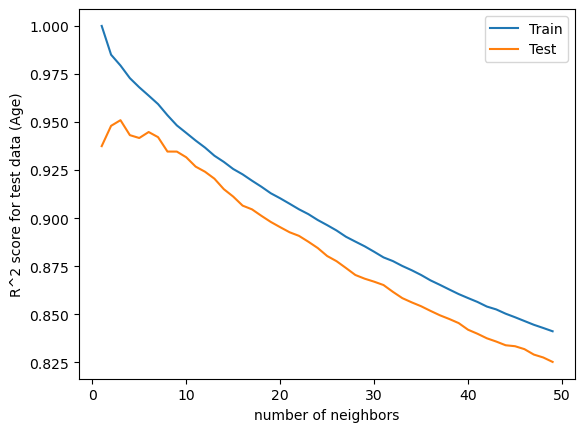

Train Score:  0.9794008847997314 

Test Score:  0.9509522186063538 

r2 mean cross validate score: 0.951186700508608 

neg_mean_squared_error mean cross validate score: -0.025199984798920223 

neg_root_mean_squared_error mean cross validate score: -0.15871977625625014 

neg_mean_absolute_error mean cross validate score: -0.11871180616646179 



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X2, stellarMass_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X2, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

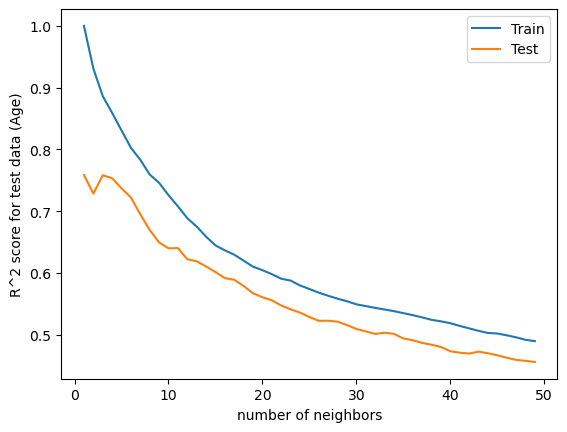

Train Score:  0.8863427127279826 

Test Score:  0.7581213891407615 

r2 mean cross validate score: 0.7568358079295379 

neg_mean_squared_error mean cross validate score: -0.02999149577740014 

neg_root_mean_squared_error mean cross validate score: -0.17140373179619475 

neg_mean_absolute_error mean cross validate score: -0.08952926874679343 



In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

In [32]:
# Finding important features
features = spectra.columns
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X, dust_values)
lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

# Selecting important features
threshold = 0.1
not_important_features = lasso_coef_df[(lasso_coef_df['coef'] > -threshold) & (lasso_coef_df['coef'] < threshold)]['feature'].values

display(lasso_coef_df[lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10))

#number of important features based on threshold var
print(f"{len(spectra.columns) - len(list(not_important_features))} features remain")

new_spectra = spectra.drop(not_important_features, axis=1)
X2 = new_spectra

/Users/janet/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e+01, tolerance: 1.248e-02
  model = cd_fast.enet_coordinate_descent(


,feature,coef
0,feature_299,0.323247
1,feature_428,0.102217
2,feature_298,0.085186
3,feature_480,0.053829
4,feature_686,0.027690
5,feature_765,0.025337
6,feature_699,0.021474
7,feature_681,0.021474
8,feature_684,0.018664
9,feature_523,0.018390


6 features remain


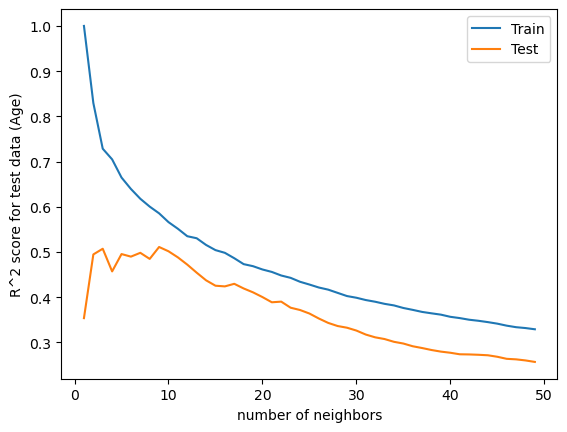

Train Score:  0.7284925498255775 

Test Score:  0.5073065508787603 

r2 mean cross validate score: 0.4918091912835802 

neg_mean_squared_error mean cross validate score: -0.06409862083359044 

neg_root_mean_squared_error mean cross validate score: -0.24894060653266648 

neg_mean_absolute_error mean cross validate score: -0.11696772267271882 



In [33]:
X_train, X_test, y_train, y_test = train_test_split(X2, dust_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X2, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")